In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# tensorflow 2.0
from tensorflow.keras.models import load_model  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers 

# sklearn => useful for pre-process
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

print(tf.__version__)

2.0.0


In [35]:
# Read CSV file
df = pd.read_csv('./sonar.csv', header=None)
print(type(df))
print(df.head(5))
print(df.info())

data = df.values
print(type(data))
print(data[0])

# Type conversion: float => numpy.float64
X = data[:, 0:60].astype(float)  
print(type(X[0][0]))

Y_str = data[:, 60]
print(Y_str)

# Transform categories => to numbers, by alphabetic order
encoder = LabelEncoder()
encoder.fit(Y_str)
Y = encoder.transform(Y_str)
print(Y)

<class 'pandas.core.frame.DataFrame'>
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0

In [36]:
seed = 0

# split data => test 85%, validation 15%
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.15,
                                                            random_state=seed)
# split test data(85%) => test 90%, validation 10%
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

# stratify option
# https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

print(y_val)
print(y_val.shape) 

[1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0]
(18,)


In [37]:
model = Sequential()

model.add(Dense(250, input_shape=(60, ), activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(100, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(60, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(30, activation='relu',
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', 
                                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=5)
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=5, callbacks=[early_stopping])

Train on 158 samples, validate on 18 samples
Epoch 1/1000
158/158 [==============================] - 1s 6ms/sample - loss: 3.9258 - accuracy: 0.5696 - val_loss: 3.2936 - val_accuracy: 0.5556
Epoch 2/1000
158/158 [==============================] - 0s 495us/sample - loss: 2.8312 - accuracy: 0.6076 - val_loss: 2.3624 - val_accuracy: 0.6111
Epoch 3/1000
158/158 [==============================] - 0s 456us/sample - loss: 2.0321 - accuracy: 0.7089 - val_loss: 1.7151 - val_accuracy: 0.6111
Epoch 4/1000
158/158 [==============================] - 0s 462us/sample - loss: 1.5209 - accuracy: 0.6646 - val_loss: 1.3408 - val_accuracy: 0.6111
Epoch 5/1000
158/158 [==============================] - 0s 430us/sample - loss: 1.2232 - accuracy: 0.7532 - val_loss: 1.2654 - val_accuracy: 0.6111
Epoch 6/1000
158/158 [==============================] - 0s 373us/sample - loss: 1.0645 - accuracy: 0.7848 - val_loss: 1.2413 - val_accuracy: 0.6111
Epoch 7/1000
158/158 [==============================] - 0s 548us/samp

Epoch 56/1000
158/158 [==============================] - 0s 438us/sample - loss: 0.4382 - accuracy: 0.8987 - val_loss: 0.5303 - val_accuracy: 0.8333
Epoch 57/1000
158/158 [==============================] - 0s 399us/sample - loss: 0.4566 - accuracy: 0.8987 - val_loss: 0.6211 - val_accuracy: 0.7778
Epoch 58/1000
158/158 [==============================] - 0s 416us/sample - loss: 0.4141 - accuracy: 0.9241 - val_loss: 0.6938 - val_accuracy: 0.7778
Epoch 59/1000
158/158 [==============================] - 0s 470us/sample - loss: 0.4044 - accuracy: 0.9304 - val_loss: 0.7082 - val_accuracy: 0.7222


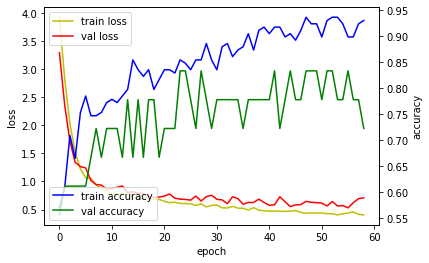

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 250)               15250     
_________________________________________________________________
dense_36 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_37 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 48,271
Trainable params: 48,271
Non-trainable params: 0
_________________________________________________________________


In [38]:
fig, loss_ax = plt.subplots()

# double y-axis
acc_ax = loss_ax.twinx() 

# y-axis (left)
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

# y-axis (right)
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
#acc_ax.set_ylim([0.0, 1.0])

# axis labels
loss_ax.set_xlabel('epoch')  
loss_ax.set_ylabel('loss')   
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left') 
acc_ax.legend(loc='lower left')  

plt.show()
model.summary()

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('Loss:', test_loss, '/Accuracy:', (test_acc*100), '%')

Loss: 0.8191494266502559 /Accuracy: 75.0 %


# K-fold Cross Validation

In [40]:
seed = 0

# devide validation group => into 5, by row index
nfold = 5
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=seed)

# sample train & validation data indexes
for train, val in skf.split(X, Y):
    print(train.shape)
    print(val.shape)
    print(val[0:10])

(165,)
(43,)
[ 1  5  6  7  9 12 15 17 18 29]
(166,)
(42,)
[ 4 16 22 25 28 33 37 39 44 47]
(167,)
(41,)
[ 8 13 24 26 30 31 34 40 45 52]
(167,)
(41,)
[11 14 19 27 32 36 38 41 50 51]
(167,)
(41,)
[ 0  2  3 10 20 21 23 35 42 43]


Train on 165 samples, validate on 43 samples
Epoch 1/1000
165/165 [==============================] - 1s 6ms/sample - loss: 3.9014 - accuracy: 0.5515 - val_loss: 3.2981 - val_accuracy: 0.5349
Epoch 2/1000
165/165 [==============================] - 0s 491us/sample - loss: 2.8090 - accuracy: 0.6364 - val_loss: 2.3782 - val_accuracy: 0.5814
Epoch 3/1000
165/165 [==============================] - 0s 485us/sample - loss: 2.0369 - accuracy: 0.6242 - val_loss: 1.7814 - val_accuracy: 0.5581
Epoch 4/1000
165/165 [==============================] - 0s 474us/sample - loss: 1.5230 - accuracy: 0.6909 - val_loss: 1.4132 - val_accuracy: 0.6279
Epoch 5/1000
165/165 [==============================] - 0s 467us/sample - loss: 1.2475 - accuracy: 0.7091 - val_loss: 1.2505 - val_accuracy: 0.6279
Epoch 6/1000
165/165 [==============================] - 0s 473us/sample - loss: 1.0789 - accuracy: 0.7576 - val_loss: 1.0783 - val_accuracy: 0.6744
Epoch 7/1000
165/165 [==============================] - 0s 436us/samp

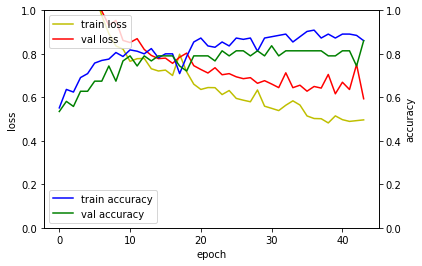

Train on 166 samples, validate on 42 samples
Epoch 1/1000
166/166 [==============================] - 1s 5ms/sample - loss: 3.9263 - accuracy: 0.5482 - val_loss: 3.2840 - val_accuracy: 0.6429
Epoch 2/1000
166/166 [==============================] - 0s 577us/sample - loss: 2.8193 - accuracy: 0.5723 - val_loss: 2.3919 - val_accuracy: 0.5238
Epoch 3/1000
166/166 [==============================] - 0s 488us/sample - loss: 2.0071 - accuracy: 0.6747 - val_loss: 1.7242 - val_accuracy: 0.6190
Epoch 4/1000
166/166 [==============================] - 0s 500us/sample - loss: 1.5940 - accuracy: 0.6084 - val_loss: 1.4553 - val_accuracy: 0.4762
Epoch 5/1000
166/166 [==============================] - 0s 467us/sample - loss: 1.3174 - accuracy: 0.6205 - val_loss: 1.2180 - val_accuracy: 0.5952
Epoch 6/1000
166/166 [==============================] - 0s 464us/sample - loss: 1.1067 - accuracy: 0.7289 - val_loss: 1.0897 - val_accuracy: 0.6190
Epoch 7/1000
166/166 [==============================] - 0s 464us/samp

Epoch 56/1000
166/166 [==============================] - 0s 470us/sample - loss: 0.5042 - accuracy: 0.8795 - val_loss: 0.6737 - val_accuracy: 0.8333
Loss: 0.673669159412384 /Accuracy: 83.33333134651184 %
count=  2


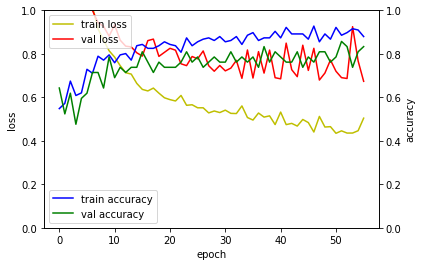

Train on 167 samples, validate on 41 samples
Epoch 1/1000
167/167 [==============================] - 1s 5ms/sample - loss: 3.9453 - accuracy: 0.5449 - val_loss: 3.3655 - val_accuracy: 0.5854
Epoch 2/1000
167/167 [==============================] - 0s 498us/sample - loss: 2.8813 - accuracy: 0.6048 - val_loss: 2.5046 - val_accuracy: 0.6098
Epoch 3/1000
167/167 [==============================] - 0s 479us/sample - loss: 2.0915 - accuracy: 0.6587 - val_loss: 1.9035 - val_accuracy: 0.4878
Epoch 4/1000
167/167 [==============================] - 0s 473us/sample - loss: 1.6002 - accuracy: 0.7126 - val_loss: 1.5523 - val_accuracy: 0.5610
Epoch 5/1000
167/167 [==============================] - 0s 485us/sample - loss: 1.3497 - accuracy: 0.7006 - val_loss: 1.3746 - val_accuracy: 0.5366
Epoch 6/1000
167/167 [==============================] - 0s 545us/sample - loss: 1.1497 - accuracy: 0.7425 - val_loss: 1.2618 - val_accuracy: 0.5854
Epoch 7/1000
167/167 [==============================] - 0s 455us/samp

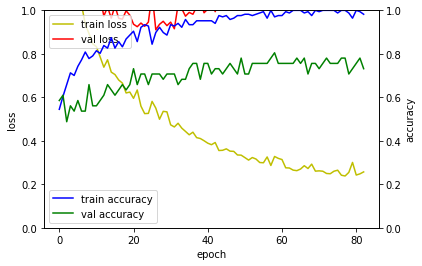

Train on 167 samples, validate on 41 samples
Epoch 1/1000
167/167 [==============================] - 1s 6ms/sample - loss: 3.9089 - accuracy: 0.5329 - val_loss: 3.2356 - val_accuracy: 0.5366
Epoch 2/1000
167/167 [==============================] - 0s 534us/sample - loss: 2.7401 - accuracy: 0.6347 - val_loss: 2.2382 - val_accuracy: 0.6098
Epoch 3/1000
167/167 [==============================] - 0s 485us/sample - loss: 1.9201 - accuracy: 0.6048 - val_loss: 1.5845 - val_accuracy: 0.6098
Epoch 4/1000
167/167 [==============================] - 0s 473us/sample - loss: 1.4255 - accuracy: 0.5090 - val_loss: 1.2293 - val_accuracy: 0.6829
Epoch 5/1000
167/167 [==============================] - 0s 467us/sample - loss: 1.1316 - accuracy: 0.6287 - val_loss: 1.0437 - val_accuracy: 0.6829
Epoch 6/1000
167/167 [==============================] - 0s 479us/sample - loss: 1.0009 - accuracy: 0.6048 - val_loss: 0.9192 - val_accuracy: 0.7073
Epoch 7/1000
167/167 [==============================] - 0s 461us/samp

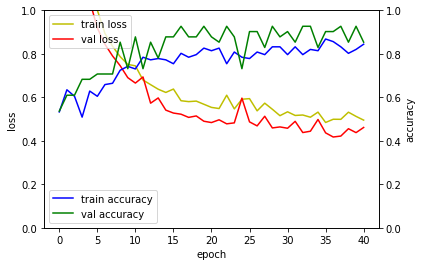

Train on 167 samples, validate on 41 samples
Epoch 1/1000
167/167 [==============================] - 1s 5ms/sample - loss: 3.9086 - accuracy: 0.5150 - val_loss: 3.2604 - val_accuracy: 0.6585
Epoch 2/1000
167/167 [==============================] - 0s 480us/sample - loss: 2.7791 - accuracy: 0.6527 - val_loss: 2.3006 - val_accuracy: 0.5610
Epoch 3/1000
167/167 [==============================] - 0s 479us/sample - loss: 1.9748 - accuracy: 0.6647 - val_loss: 1.6449 - val_accuracy: 0.6585
Epoch 4/1000
167/167 [==============================] - 0s 473us/sample - loss: 1.4762 - accuracy: 0.6647 - val_loss: 1.2745 - val_accuracy: 0.7317
Epoch 5/1000
167/167 [==============================] - 0s 485us/sample - loss: 1.2028 - accuracy: 0.6467 - val_loss: 1.1680 - val_accuracy: 0.5854
Epoch 6/1000
167/167 [==============================] - 0s 503us/sample - loss: 1.0707 - accuracy: 0.6826 - val_loss: 0.9685 - val_accuracy: 0.7317
Epoch 7/1000
167/167 [==============================] - 0s 467us/samp

Epoch 56/1000
167/167 [==============================] - 0s 455us/sample - loss: 0.3716 - accuracy: 0.9401 - val_loss: 0.8961 - val_accuracy: 0.7561
Epoch 57/1000
167/167 [==============================] - 0s 461us/sample - loss: 0.3974 - accuracy: 0.9281 - val_loss: 0.8460 - val_accuracy: 0.7073
Epoch 58/1000
167/167 [==============================] - 0s 467us/sample - loss: 0.3589 - accuracy: 0.9701 - val_loss: 0.9181 - val_accuracy: 0.7073
Epoch 59/1000
167/167 [==============================] - 0s 461us/sample - loss: 0.3605 - accuracy: 0.9581 - val_loss: 0.8638 - val_accuracy: 0.7073
Epoch 60/1000
167/167 [==============================] - 0s 467us/sample - loss: 0.3893 - accuracy: 0.9222 - val_loss: 0.8796 - val_accuracy: 0.7073
Epoch 61/1000
167/167 [==============================] - 0s 467us/sample - loss: 0.3862 - accuracy: 0.9281 - val_loss: 0.8690 - val_accuracy: 0.7317
Epoch 62/1000
167/167 [==============================] - 0s 449us/sample - loss: 0.3598 - accuracy: 0.9581

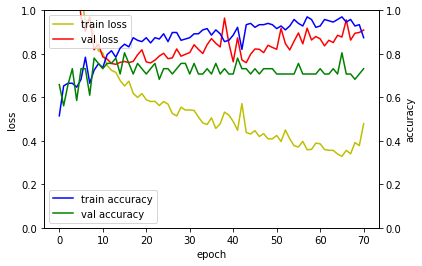

In [41]:
acc = []  
count = 0 

for train, val in skf.split(X, Y):
    model = Sequential()

    model.add(Dense(250, input_shape=(60, ), activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dense(100, activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
    model.add(Dense(60, activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))  
    model.add(Dense(30, activation='relu',
              kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001))) 
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='loss', patience=5)
    hist = model.fit(X[train], Y[train], validation_data=(X[val], Y[val]),
                     epochs=1000, 
                     batch_size=5, callbacks=[early_stopping])

    test_loss, test_acc = model.evaluate(X[val], Y[val], batch_size=2, verbose=0)
    print('Loss:', test_loss, '/Accuracy:', (test_acc*100), '%')
    
    acc.append(test_acc)
    count = count + 1
    print('count= ', count)
    
    # visuallization
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_ylim([0.0, 1.0]) 

    acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
    acc_ax.set_ylim([0.0, 1.0])

    loss_ax.set_xlabel('epoch') 
    loss_ax.set_ylabel('loss')   
    acc_ax.set_ylabel('accuracy') 

    loss_ax.legend(loc='upper left') 
    acc_ax.legend(loc='lower left')  

    plt.show()    
    

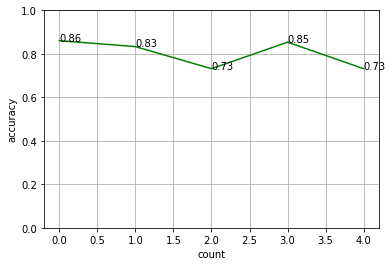

In [42]:
x = range(count)
fig = plt.figure()

#  fig.add_subplot(1, 1, 1) => row=1, col=1, first plot
ax = fig.add_subplot(111) 

plt.plot(x, acc, c='g')
plt.ylim(0, 1)
plt.xlabel('count')
plt.ylabel('accuracy')
plt.grid(True)

# combine cols in same row
for xy in zip(x, acc): 
    # print(type(xy))  # <class 'tuple'>
    ax.annotate('%.2f' % xy[1], xy=xy, xytext=xy)  
    
plt.show()    

In [43]:
accuracy = np.array(acc)

print(accuracy)
print('mean of all validated data: {0:.1f}%'.format(np.mean(accuracy) * 100)) 

[0.8604651  0.8333333  0.73170733 0.85365856 0.73170733]
mean of all validated data: 80.2%
